In [1]:
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

In [20]:
def mel_scale(f):
    '''define the mel scale for human pitch perception'''
    return 1125*np.log(1 + f/700)

def mel_inverse(f_mel):
    '''invert mel spaced frequencies to get back real frequencies'''
    return 700*(np.exp((f_mel/1125))-1)

In [34]:
freqs = np.linspace(300, 10000, 1000)
mel_scaled_freqs = mel_scale(freqs)

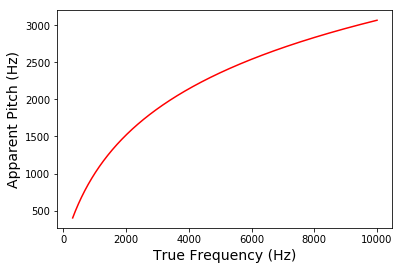

In [35]:
plt.plot(freqs, mel_scaled_freqs, '-r')
plt.xlabel('True Frequency (Hz)', fontsize = 14)
plt.ylabel('Apparent Pitch (Hz)', fontsize = 14)
plt.savefig('Mel_Scale.png')

In [36]:
def triangular_window(freqs, fc, df):
    '''plot a traiangular function with centre fc and width df'''
    tri_filter = np.zeros(freqs.shape[0])
    left_side = (freqs >= (fc-df)) & (freqs <= fc)
    right_side = (freqs <= (fc+df)) & (freqs > fc)
    tri_filter[left_side] = (freqs[left_side] - (fc-df))/df
    tri_filter[right_side] = ((fc+df) - freqs[right_side])/df
    return tri_filter

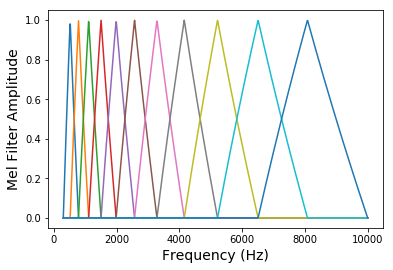

In [46]:
f_min = freqs[0]
f_max = freqs[-1]
mel_min = mel_scale(f_min)
mel_max = mel_scale(f_max)

n_filters = 12
mel_filter_spacing = (mel_max-mel_min)/n_filters
mel_filter_centres = np.arange(mel_min, mel_max,mel_filter_spacing)
real_freq_centres = mel_inverse(mel_filter_centres)

for n,fc in enumerate(real_freq_centres[0:-1]):
    plt.plot(freqs, triangular_window(mel_scale(freqs),
                                        mel_filter_centres[n+1], 
                                        mel_filter_centres[n+1]-mel_filter_centres[n]))
plt.xlabel('Frequency (Hz)', fontsize = 14)
plt.ylabel('Mel Filter Amplitude', fontsize = 14)
plt.savefig('Mel_Filterbank.png')